In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dados completos das carteiras
carteira_A = [0.01, 0.02, -0.015, 0.03, 0.005]
carteira_B = [0.012, 0.015, -0.01, 0.025, 0.008]

carteira_C = [0.1, 0.025, 0.02, 0.025, 0.027, 0.03]
carteira_D = [0.1, 0.027, 0.03, 0.0225, 0.023, 0.03]

carteira_E = [0.1, 0.02, 0.03, 0.04, 0.05, 0.06]
carteira_F = [-0.1, -0.02, -0.03, -0.035, -0.04, -0.055]

# Conjunto adicional para análise
carteira_G = [0.15, -0.05, 0.07, 0.03, -0.02, 0.04, -0.03, 0.08]
carteira_H = [0.02, 0.015, 0.017, 0.021, 0.019, 0.022, 0.025, 0.018]

In [3]:
# Função para análise descritiva completa
def analise_descritiva(dados, nome):
    print(f"\n=== Análise da Carteira {nome} ===")
    print(f"Média: {np.mean(dados):.4f}")
    print(f"Mediana: {np.median(dados):.4f}")
    print(f"Desvio Padrão: {np.std(dados):.4f}")
    print(f"Variância: {np.var(dados):.4f}")
    print(f"Valor Mínimo: {np.min(dados):.4f}")
    print(f"Valor Máximo: {np.max(dados):.4f}")

    q1, q2, q3 = np.percentile(dados, [25, 50, 75])
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    print("\nMedidas de Posição:")
    print(f"Q1 (25%): {q1:.4f}")
    print(f"Q2/Mediana (50%): {q2:.4f}")
    print(f"Q3 (75%): {q3:.4f}")
    print(f"IQR: {iqr:.4f}")

    print("\nLimites para Outliers:")
    print(f"Limite Inferior: {limite_inf:.4f}")
    print(f"Limite Superior: {limite_sup:.4f}")

    outliers = [x for x in dados if x < limite_inf or x > limite_sup]
    print(f"\nOutliers Detectados: {outliers}")

# Aplicando a análise
analise_descritiva(carteira_E, "E")
analise_descritiva(carteira_F, "F")


=== Análise da Carteira E ===
Média: 0.0500
Mediana: 0.0450
Desvio Padrão: 0.0258
Variância: 0.0007
Valor Mínimo: 0.0200
Valor Máximo: 0.1000

Medidas de Posição:
Q1 (25%): 0.0325
Q2/Mediana (50%): 0.0450
Q3 (75%): 0.0575
IQR: 0.0250

Limites para Outliers:
Limite Inferior: -0.0050
Limite Superior: 0.0950

Outliers Detectados: [0.1]

=== Análise da Carteira F ===
Média: -0.0467
Mediana: -0.0375
Desvio Padrão: 0.0261
Variância: 0.0007
Valor Mínimo: -0.1000
Valor Máximo: -0.0200

Medidas de Posição:
Q1 (25%): -0.0513
Q2/Mediana (50%): -0.0375
Q3 (75%): -0.0312
IQR: 0.0200

Limites para Outliers:
Limite Inferior: -0.0813
Limite Superior: -0.0012

Outliers Detectados: [-0.1]


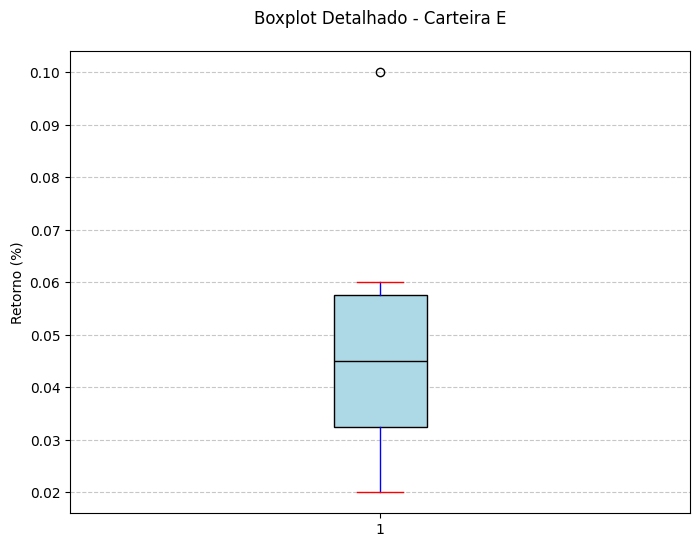

<ipython-input-4-1ed99e659426>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([carteira_A, carteira_B, carteira_E, carteira_F, carteira_G, carteira_H],


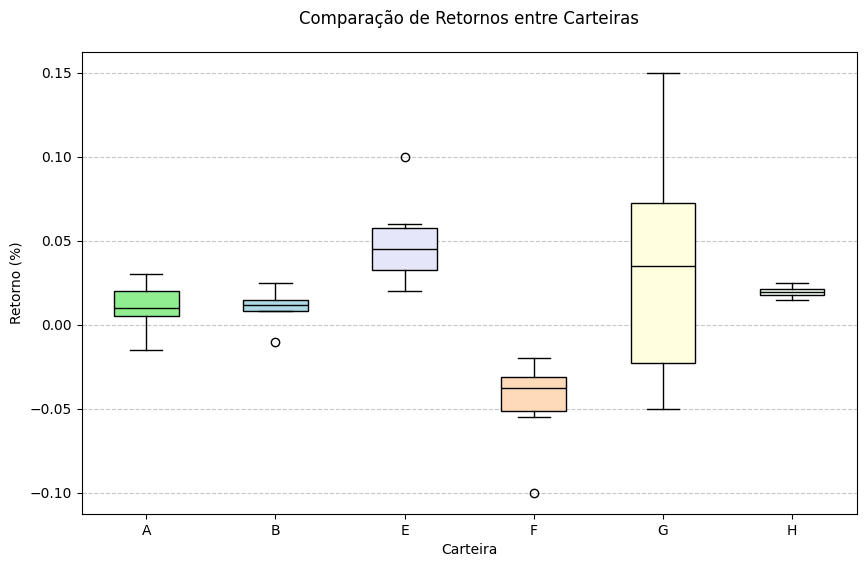

In [4]:
# Boxplot individual detalhado
plt.figure(figsize=(8, 6))
plt.boxplot(carteira_E, vert=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           whiskerprops=dict(color='blue'),
           capprops=dict(color='red'),
           medianprops=dict(color='black'))
plt.title("Boxplot Detalhado - Carteira E", pad=20)
plt.ylabel("Retorno (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot comparativo
plt.figure(figsize=(10, 6))
box = plt.boxplot([carteira_A, carteira_B, carteira_E, carteira_F, carteira_G, carteira_H],
                 labels=["A", "B", "E", "F", "G", "H"],
                 patch_artist=True,
                 medianprops=dict(color='black'))

# Customização de cores
colors = ['lightgreen', 'lightblue', 'lavender', 'peachpuff', 'lightyellow', 'honeydew']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Comparação de Retornos entre Carteiras", pad=20)
plt.ylabel("Retorno (%)")
plt.xlabel("Carteira")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

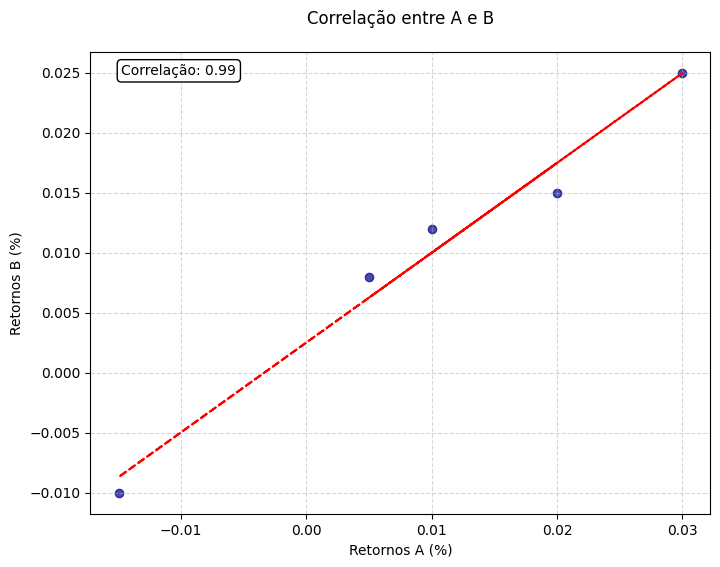

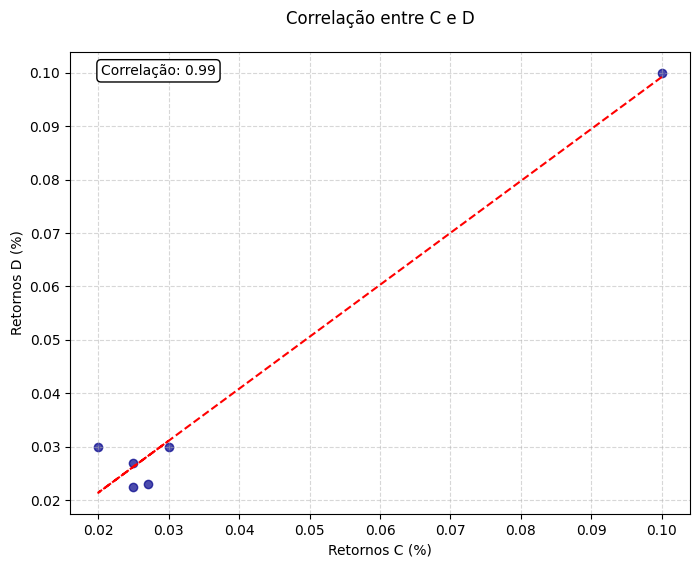

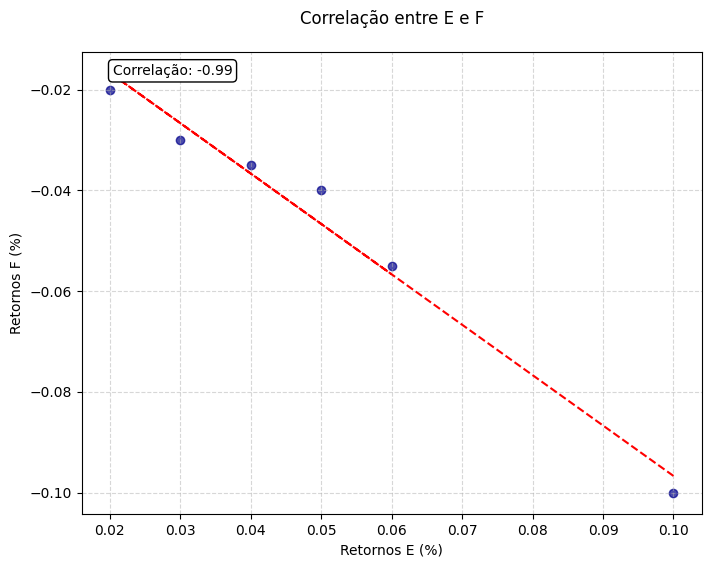

In [5]:
# Matriz de correlação completa
def plot_correlacao(dados1, dados2, nome1, nome2):
    plt.figure(figsize=(8, 6))
    plt.scatter(dados1, dados2, color='darkblue', alpha=0.7)

    # Linha de tendência
    z = np.polyfit(dados1, dados2, 1)
    p = np.poly1d(z)
    plt.plot(dados1, p(dados1), "r--")

    plt.title(f"Correlação entre {nome1} e {nome2}", pad=20)
    plt.xlabel(f"Retornos {nome1} (%)")
    plt.ylabel(f"Retornos {nome2} (%)")

    correlacao = np.corrcoef(dados1, dados2)[0, 1]
    plt.annotate(f'Correlação: {correlacao:.2f}',
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round", fc="w"))

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Gerando gráficos de correlação
plot_correlacao(carteira_A, carteira_B, "A", "B")
plot_correlacao(carteira_C, carteira_D, "C", "D")
plot_correlacao(carteira_E, carteira_F, "E", "F")